In [ ]:
## importing necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings   # ignore all the unncecessary messages that araise whenever we do the visualisations
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
## Loading the dataset
## Kaggle Link: https://www.kaggle.com/datasets/ninzaami/loan-predication
dataset = pd.read_csv('/content/drive/MyDrive/MUST Research/Binary_Classification_Dataset/Loan Prediction Dataset/data.csv')

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(dataset.shape)

(614, 13)


In [ ]:
## columns in the dataset
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
## checking for missing values

dataset.isnull().sum()

## observation: many columns(Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History) are having missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

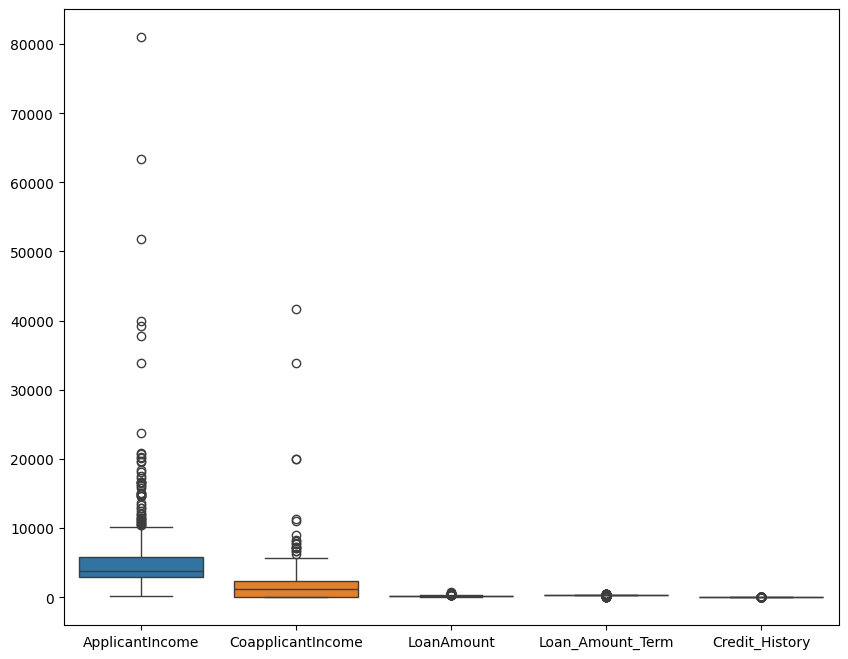

In [ ]:
## now, lets fill the null values of numerical features
## But before doing the above task, lets check whether outliers are present or not
## if outliers are present, then fill the missing values with median
## otherwise fill the missing values with mean

## checking for outliers by plotting the boxplot
plt.figure(figsize=(10,8))
sns.boxplot(data = dataset)

In [ ]:
## Observation: ApplicantIncome, CoapplicantIncome and LoanAmount features are having outliers

## features having null values along with outliers can be filled with median as median is less sensitive to outliers
## features having null values but no outliers can be filled with mean

In [ ]:
## filling the numerical features which are having null values

dataset['LoanAmount'].fillna(dataset['LoanAmount'].median(), inplace = True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mean(), inplace = True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mean(), inplace = True)

In [ ]:
dataset['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [ ]:
dataset['Gender'].mode()[0]

'Male'

In [ ]:
## filling the Categorical features which are having null values
## we can use mode

dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace = True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace = True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace = True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace = True)

In [ ]:
dataset.isnull().sum()    ## all the null values have been handled

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
## Univariate Analysis of features
## we, can use countplot for categorical features for doing univariate analysis

Number of loan requests as per the Gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


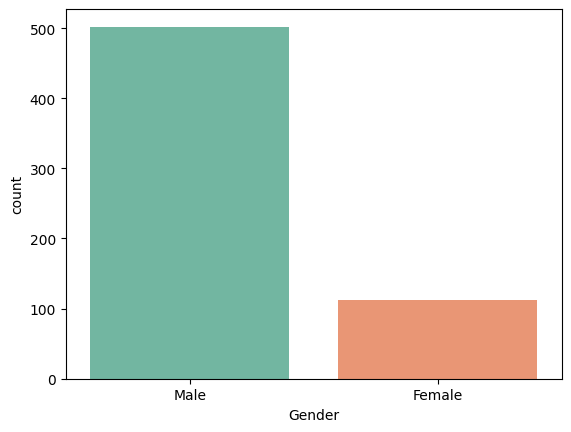

In [ ]:
## Gender
print('Number of loan requests as per the Gender:')
print(dataset['Gender'].value_counts())
sns.countplot(data = dataset, x = 'Gender', palette='Set2')   ## palette='Set1/Set2' is for two different colors of diagram
plt.show()


## Observation: Loan requests are more from male persons

Number of loan requests as per the Marital Status:
Married
Yes    401
No     213
Name: count, dtype: int64


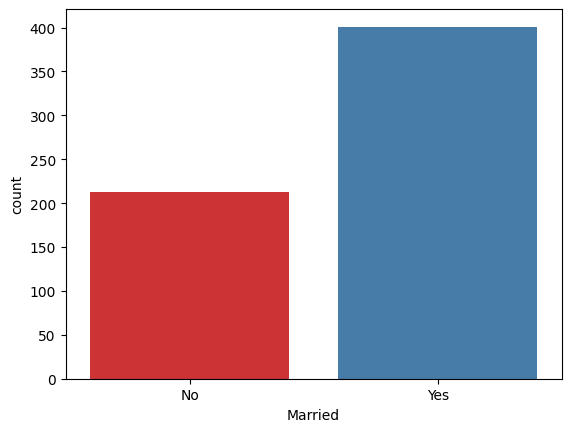

In [ ]:
## Married
print('Number of loan requests as per the Marital Status:')
print(dataset['Married'].value_counts())
sns.countplot(data = dataset, x = 'Married', palette='Set1')   ## palette='Set1/Set2' is for two different colors of diagram
plt.show()


## Observation: Married people are giving more loan requests than that of unmarried ones

Number of loan requests as per the number of Dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


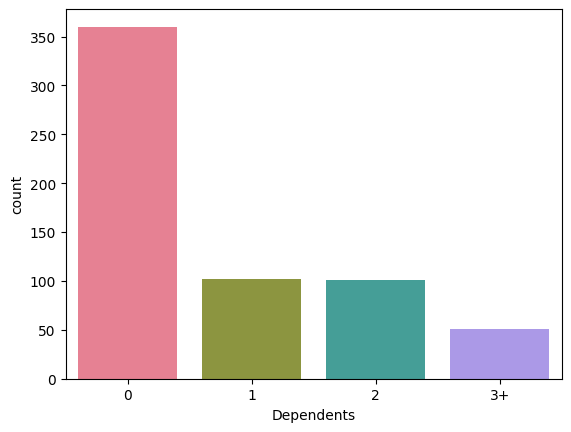

In [ ]:
## Dependents
print('Number of loan requests as per the number of Dependents:')
print(dataset['Dependents'].value_counts())
sns.countplot(data = dataset, x = 'Dependents', palette='husl')   ## palette='Set1/Set2/hls/husl' is for two different colors of diagram
plt.show()


## Observation: People with no dependents are asking more loans

Number of loan requests as per the number of Graduated people:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


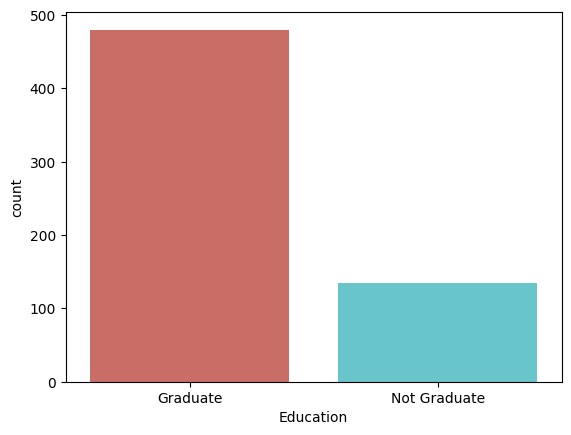

In [ ]:
## Education
print('Number of loan requests as per the number of Graduated people:')
print(dataset['Education'].value_counts())
sns.countplot(data = dataset, x = 'Education', palette='hls')   ## palette='Set1/Set2/hls/husl' is for two different colors of diagram
plt.show()


## Observation: Greater number of loan requests are coming from Graduated people

Number of loan requests as per the number of Self_Employed people:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


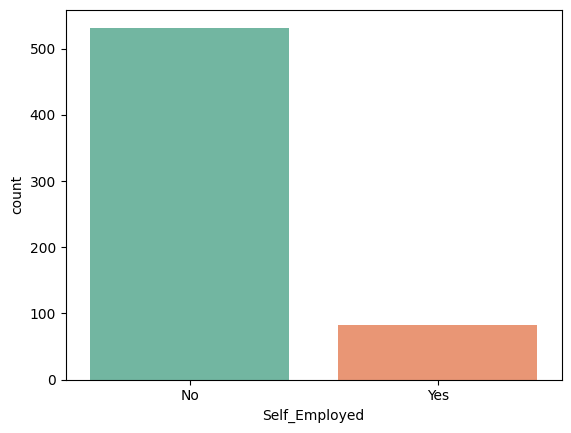

In [ ]:
## Self_Employed
print('Number of loan requests as per the number of Self_Employed people:')
print(dataset['Self_Employed'].value_counts())
sns.countplot(data = dataset, x = 'Self_Employed', palette='Set2')   ## palette='Set1/Set2/hls/husl' is for two different colors of diagram
plt.show()


## Observation: Majority of the loan requests are coming from people who are not self-employed

Number of loan requests as per the Property_Area of the people:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


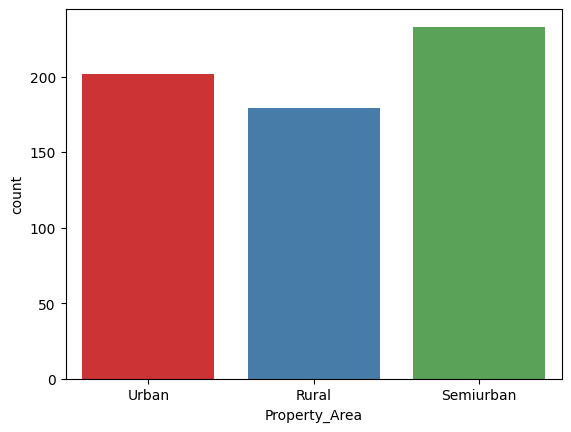

In [ ]:
## Property_Area
print('Number of loan requests as per the Property_Area of the people:')
print(dataset['Property_Area'].value_counts())
sns.countplot(data = dataset, x = 'Property_Area', palette='Set1')   ## palette='Set1/Set2/hls/husl' is for two different colors of diagram
plt.show()


## observation: People belonging to Semiurban and Urban areas have applied for more number as
             ## compared to people belonging to Rural area.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: >

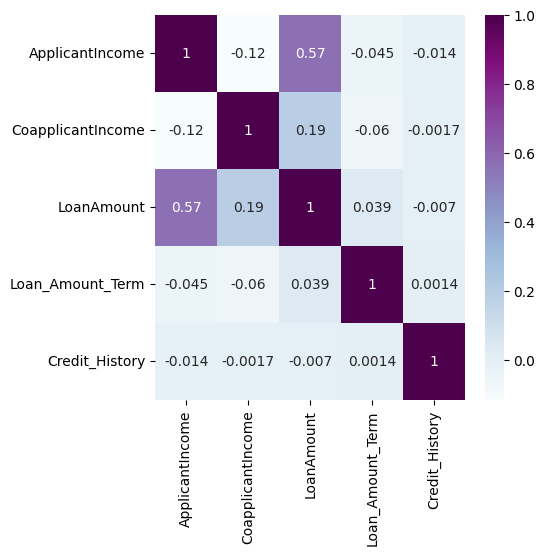

In [ ]:
## Let's see the correlation between the features
dataset_corr = dataset.corr(numeric_only=True)
plt.figure(figsize=(5,5))
sns.heatmap(dataset_corr, annot = True, cmap='BuPu')   ## used for visualizing the correlation


## OBSERVATION:
## 1) ApplicantIncome and LoanAmount are highly correlated
## 2) CoapplicantIncome and LoanAmount are positively correlated

# **Feature Engineering:**

In [ ]:
dataset['CoapplicantIncome'].value_counts()   ## as we can see most of the Applicant's CoapplicantIncome is 0, we can add this income to ApplicantIncome
                                              ## and drop the CoapplicantIncome column

CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64

In [ ]:
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [ ]:
dataset.rename(columns = {'TotalIncome':'Total_Applicant_Income'}, inplace = True)

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [ ]:
## We can visualize the numerical columns also
## for univariate analysis, use histplot (or) distplot (recommended)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

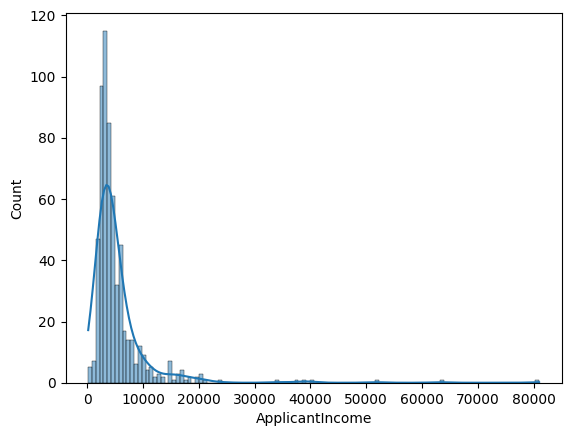

In [ ]:
## visualizing ApplicantIncome

sns.histplot(data=dataset, x="ApplicantIncome", kde=True)   ## right skewness

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

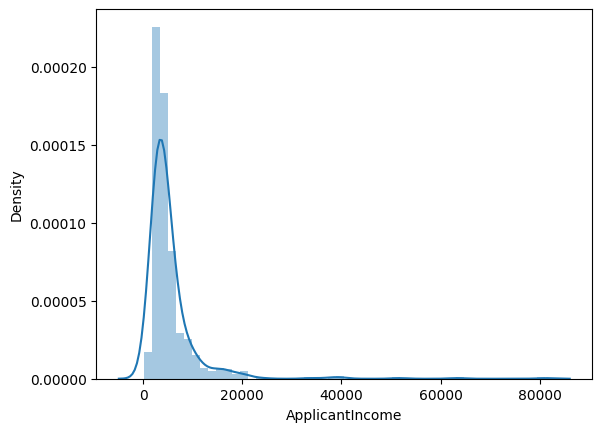

In [ ]:
## using distplot
sns.distplot(dataset['ApplicantIncome'])    ## right-skewness

<Axes: xlabel='ApplicantIncomeLogNormal', ylabel='Density'>

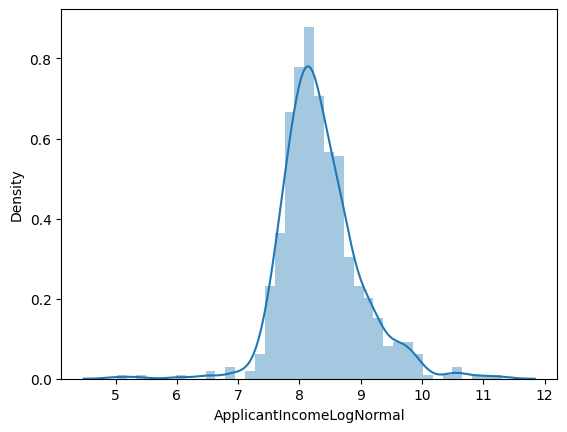

In [ ]:
## we can apply log normalization to reduce the skewness
dataset['ApplicantIncomeLogNormal'] = np.log(dataset['ApplicantIncome'] + 1)
sns.distplot(dataset['ApplicantIncomeLogNormal'])

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,ApplicantIncomeLogNormal
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681


In [ ]:
## Now, we can drop ApplicantIncome column as we have just now created the ApplicantIncomeLogNormal
## we can also drop the CoapplicantIncome column as it is no more required as we have integrated it in Total_Applicant_Income column

dataset.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace = True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   614 non-null    object 
 1   Gender                    614 non-null    object 
 2   Married                   614 non-null    object 
 3   Dependents                614 non-null    object 
 4   Education                 614 non-null    object 
 5   Self_Employed             614 non-null    object 
 6   LoanAmount                614 non-null    float64
 7   Loan_Amount_Term          614 non-null    float64
 8   Credit_History            614 non-null    float64
 9   Property_Area             614 non-null    object 
 10  Loan_Status               614 non-null    object 
 11  Total_Applicant_Income    614 non-null    float64
 12  ApplicantIncomeLogNormal  614 non-null    float64
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


<Axes: xlabel='LoanAmount', ylabel='Count'>

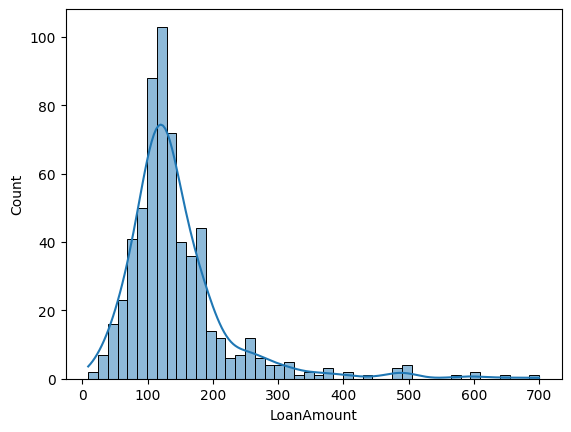

In [ ]:
## Visualizing LoanAmount

sns.histplot(data=dataset, x="LoanAmount", kde=True)    ## Observation: Right-Skewness is seen, we can apply log-normalization here also

<Axes: xlabel='LoanAmount', ylabel='Density'>

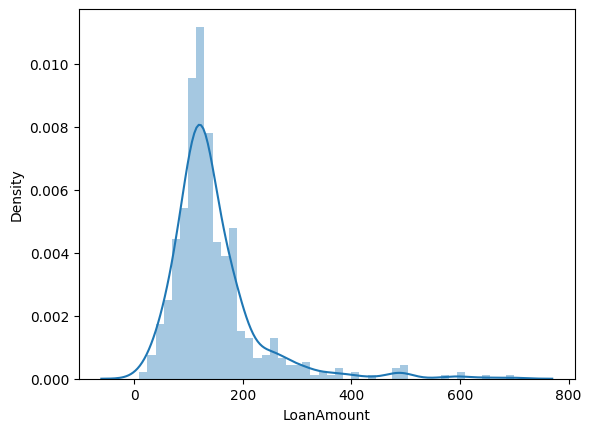

In [ ]:
sns.distplot(dataset['LoanAmount'])    ## we can also visualize by distplot

<Axes: xlabel='LoanAmountLogNormal', ylabel='Density'>

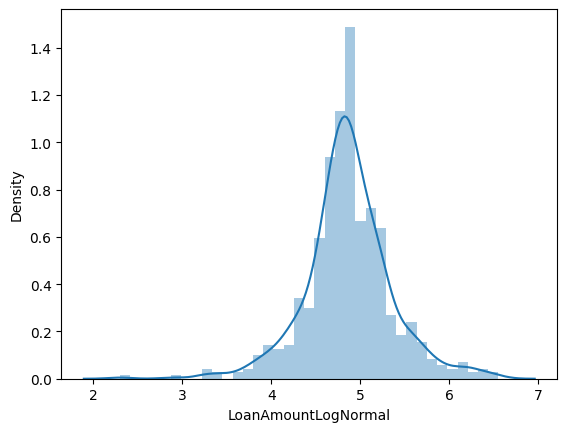

In [ ]:
## Applying log normalization to reduce the skewness
dataset['LoanAmountLogNormal'] = np.log(dataset['LoanAmount'] + 1)
sns.distplot(dataset['LoanAmountLogNormal'])

<Axes: xlabel='LoanAmountLogNormal', ylabel='Count'>

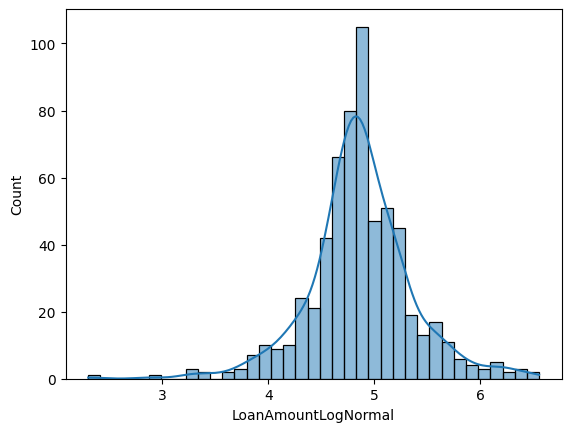

In [ ]:
sns.histplot(data=dataset, x='LoanAmountLogNormal', kde=True)

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,ApplicantIncomeLogNormal,LoanAmountLogNormal
0,LP001002,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827


<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

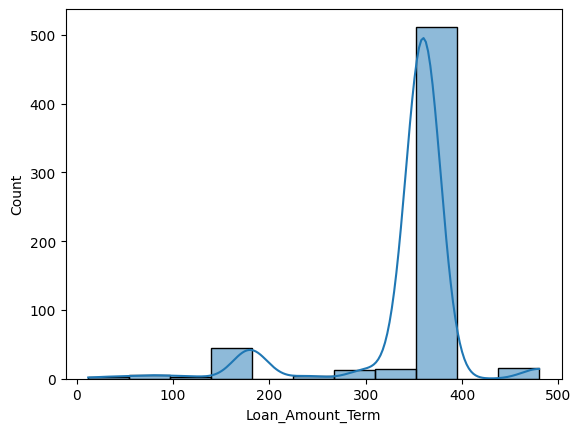

In [ ]:
## Visualizing Loan_Amount_Term

sns.histplot(data=dataset, x="Loan_Amount_Term", kde=True)

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

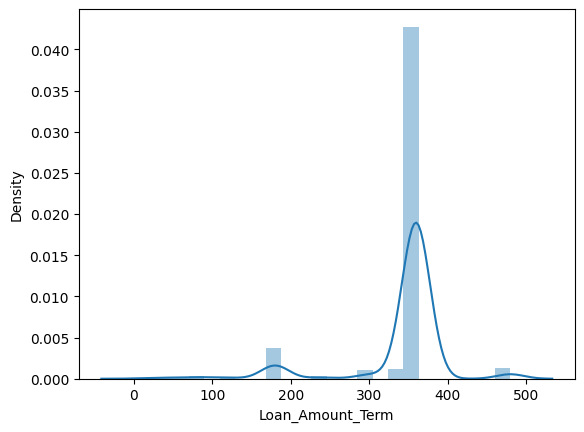

In [ ]:
sns.distplot(dataset['Loan_Amount_Term'])

<Axes: xlabel='Loan_Amount_Term_LogNormal', ylabel='Density'>

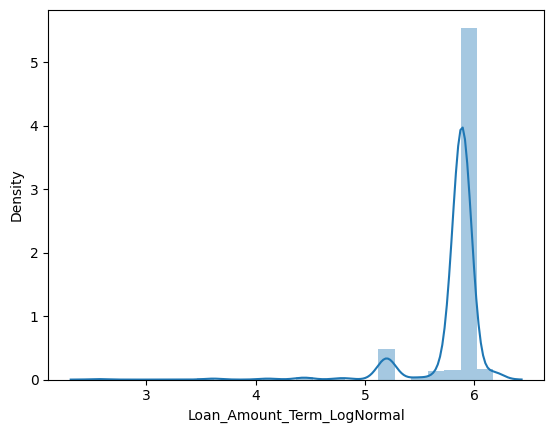

In [ ]:
## Applying log normalization to reduce the skewness
dataset['Loan_Amount_Term_LogNormal'] = np.log(dataset['Loan_Amount_Term'] + 1)
sns.distplot(dataset['Loan_Amount_Term_LogNormal'])

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,ApplicantIncomeLogNormal,LoanAmountLogNormal,Loan_Amount_Term_LogNormal
0,LP001002,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878


<Axes: xlabel='Total_Applicant_Income', ylabel='Count'>

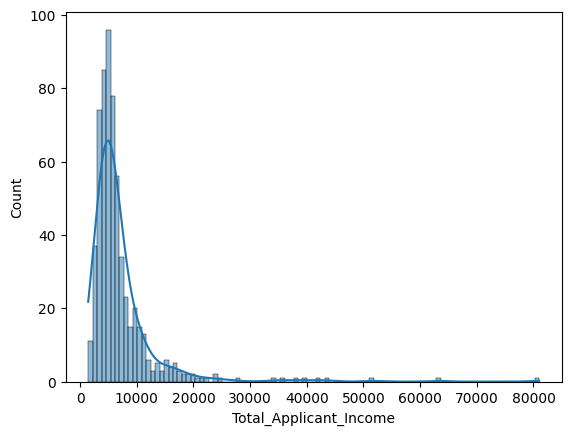

In [ ]:
## Visualizing Total_Applicant_Income
sns.histplot(data = dataset, x="Total_Applicant_Income", kde = True)    ## OBSERVATION: Right-Skewness is observed

<Axes: xlabel='Total_Applicant_Income', ylabel='Density'>

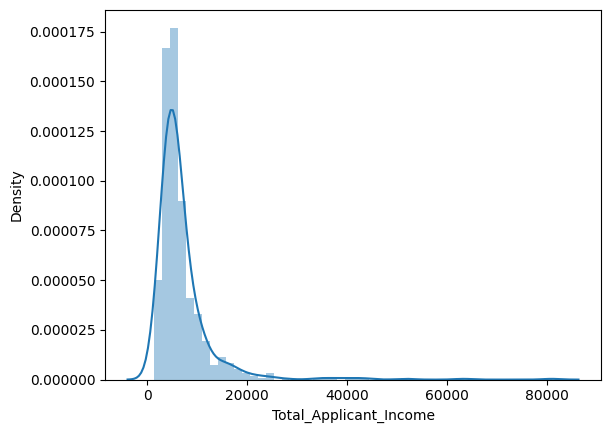

In [ ]:
sns.distplot(dataset['Total_Applicant_Income'])

<Axes: xlabel='Total_Applicant_Income_LogNormal', ylabel='Density'>

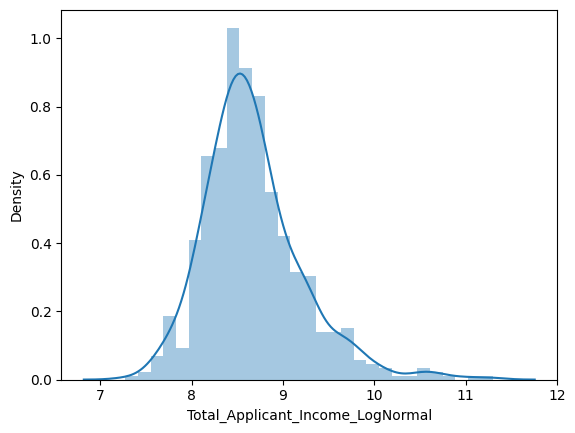

In [ ]:
## Applying log normalization to reduce the skewness
dataset['Total_Applicant_Income_LogNormal'] = np.log(dataset['Total_Applicant_Income'] + 1)
sns.distplot(dataset['Total_Applicant_Income_LogNormal'])

In [ ]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_Income,ApplicantIncomeLogNormal,LoanAmountLogNormal,Loan_Amount_Term_LogNormal,Total_Applicant_Income_LogNormal
0,LP001002,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [ ]:
## Dropping unnecessary features
dataset.drop(columns=['LoanAmount', 'Loan_Amount_Term', 'Total_Applicant_Income', 'Loan_ID'], inplace = True)

In [ ]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLogNormal,LoanAmountLogNormal,Loan_Amount_Term_LogNormal,Total_Applicant_Income_LogNormal
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [ ]:
## Converting the Categorical Columns into Numerical Ones
## There are 2 options: Label Encoding, One-hot Encoding


## Using Label Encoding

from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
label_encoder = LabelEncoder()

for col in cols:
  dataset[col] = label_encoder.fit_transform(dataset[col])

In [ ]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLogNormal,LoanAmountLogNormal,Loan_Amount_Term_LogNormal,Total_Applicant_Income_LogNormal
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [ ]:
dataset['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [ ]:
dataset.dtypes

Gender                                int64
Married                               int64
Dependents                            int64
Education                             int64
Self_Employed                         int64
Credit_History                      float64
Property_Area                         int64
Loan_Status                           int64
ApplicantIncomeLogNormal            float64
LoanAmountLogNormal                 float64
Loan_Amount_Term_LogNormal          float64
Total_Applicant_Income_LogNormal    float64
dtype: object

# **Splitting into Independent and Dependent feature:**

In [ ]:
y = dataset['Loan_Status']    ## dependent feature
dataset.drop(columns=['Loan_Status'], inplace = True)

In [ ]:
X = dataset   ## independent features

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLogNormal,LoanAmountLogNormal,Loan_Amount_Term_LogNormal,Total_Applicant_Income_LogNormal
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

# **Model Development:**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

### **Logistic Regression:**

In [ ]:
logistic_regression = LogisticRegression()

In [ ]:
## training the model
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [ ]:
## prediction with the model
y_prediction = logistic_regression.predict(X_test)

In [ ]:
## accuracy (ratio of the correctly predicted values to the total values)
accuracy_logistic = accuracy_score(y_test, y_prediction)
print(f'Accuracy score of Logistic Regression: {accuracy_logistic*100}')

Accuracy score of Logistic Regression: 77.27272727272727


In [ ]:
## cross validation score

cross_score_logistic = cross_val_score(logistic_regression, X, y, cv=5)
cross_score_logistic

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [ ]:
print(f'Mean Cross Validation Score of Logistic Regression: {np.mean(cross_score_logistic)*100}')

Mean Cross Validation Score of Logistic Regression: 80.9462881514061


### **Decision Tree Classifier**

In [ ]:
decision_tree_clf = DecisionTreeClassifier()

In [ ]:
## training the model
decision_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
## prediction with the model
y_prediction_decision_tree_clf = decision_tree_clf.predict(X_test)

In [ ]:
## Accuracy of the model
accuracy_decision_tree_clf = accuracy_score(y_test, y_prediction_decision_tree_clf)
print(f'Accuracy score of Decision Tree Classifier: {accuracy_decision_tree_clf*100}')

Accuracy score of Decision Tree Classifier: 72.72727272727273


In [ ]:
## Cross Validation Score of the model
cross_score_decision_tree_clf = cross_val_score(decision_tree_clf, X, y, cv=5)
print(f'Mean Cross Validation Score of Decision Tree Classifier: {np.mean(cross_score_decision_tree_clf)*100}')

Mean Cross Validation Score of Decision Tree Classifier: 70.52379048380648


### **Random Forest Classifier**

In [ ]:
random_forest_clf = RandomForestClassifier()

In [ ]:
## Training the model
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
## Prediction with the model
y_prediction_random_forest_clf = random_forest_clf.predict(X_test)

In [ ]:
## Accuracy score of the model
accuracy_random_forest_clf = accuracy_score(y_test, y_prediction_random_forest_clf)
print(f'Accuracy score of Random Forest Classifier: {accuracy_random_forest_clf*100}')

Accuracy score of Random Forest Classifier: 77.92207792207793


### **K Nearest Neighbor**

In [ ]:
k_nearest_nbr_clf = KNeighborsClassifier()

In [ ]:
## Training the model
k_nearest_nbr_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
## Prediction with the model
y_prediction_k_nearest_nbr_clf = k_nearest_nbr_clf.predict(X_test)

In [ ]:
## Accuracy score of the model
accuracy_k_nearest_nbr_clf = accuracy_score(y_test, y_prediction_k_nearest_nbr_clf)
print(f'Accuracy score of K Nearest Neighbor Classifier: {accuracy_k_nearest_nbr_clf*100}')

Accuracy score of K Nearest Neighbor Classifier: 72.72727272727273


In [ ]:
## Cross Validation Score of the model
cross_score_k_nearest_nbr_clf = cross_val_score(k_nearest_nbr_clf, X, y, cv=5)
print(f'Mean Cross Validation Score of K Nearest Neighbor Classifier: {np.mean(cross_score_k_nearest_nbr_clf)*100}')

Mean Cross Validation Score of K Nearest Neighbor Classifier: 75.40717046514726


## **Classification Report of all the models**

In [ ]:
from sklearn.metrics import classification_report

def generate_clf_report(model_name, y_test, y_pred):
  clf_report = classification_report(y_test, y_pred)
  print(f'Classification Report for {model_name}:\n{clf_report}\n')

In [ ]:
generate_clf_report(logistic_regression, y_test, y_prediction)
generate_clf_report(decision_tree_clf, y_test, y_prediction_decision_tree_clf)
generate_clf_report(random_forest_clf, y_test, y_prediction_random_forest_clf)
generate_clf_report(k_nearest_nbr_clf, y_test, y_prediction_k_nearest_nbr_clf)

Classification Report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


Classification Report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.62      0.56      0.59        54
           1       0.77      0.82      0.80       100

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.72      0.73      0.72       154


Classification Report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.88      0.43      0.57        54
           1       0.76      0.97      0.85       100

    accuracy                

In [ ]:
## Observation from the above Classification Reports:
# The recall value for almost all the models is having huge difference between both the classes(0 & 1)
# So, there might be case of overfitting (or) imbalanced dataset
# So, lets observe the target feature

y.value_counts()

## we can observe that data is imbalanced

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [ ]:
## So, to tackle the imbalancing problem
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.over_sampling import RandomOverSampler  ## generates random values in minority class

In [ ]:
## now, lets balance the classes
over_sample = RandomOverSampler(random_state = 42)
X_resampled_df, y_resampled_df = over_sample.fit_resample(X, y)

dataset_resampled = pd.concat([pd.DataFrame(X_resampled_df, columns = X.columns), pd.Series(y_resampled_df, name = "Loan_Status")], axis = 1)

In [ ]:
X_resampled_df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLogNormal,LoanAmountLogNormal,Loan_Amount_Term_LogNormal,Total_Applicant_Income_LogNormal
0,1,0,0,0,0,1.000000,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,5.198497,8.292298
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,5.198497,7.969012


In [ ]:
y_resampled_df

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int64

In [ ]:
y_resampled_df.value_counts()   ## now, the dataset is perfectly balanced

Loan_Status
1    422
0    422
Name: count, dtype: int64

# **Now, Lets build the models on the Balanced Dataset**

In [ ]:
## Train Test Split
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled_df, y_resampled_df, test_size = 0.25, random_state = 42)

### **Logistic Regression**

In [ ]:
logistic_regression_blnced = LogisticRegression()

In [ ]:
## Training the model
logistic_regression_blnced.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
## Prediction with the model
y_prediction_resampled_logistic = logistic_regression_blnced.predict(X_test_resampled)

In [ ]:
## Accuracy Score of the model
accuracy_logistic_resampled = accuracy_score(y_test_resampled, y_prediction_resampled_logistic)
print(f'Accuracy score of Logistic Regression: {accuracy_logistic_resampled*100}')

Accuracy score of Logistic Regression: 69.66824644549763


In [ ]:
## Cross Validation Score of the model
cross_score_logistic_resampled = cross_val_score(logistic_regression_blnced, X_resampled_df, y_resampled_df, cv=5)
print(f'Cross Validation Score of Logistic Regression: {np.mean(cross_score_logistic_resampled)*100}')

Cross Validation Score of Logistic Regression: 71.80050718512257


### **Decision Tree Classifier**

In [ ]:
decision_tree_clf_blnced = DecisionTreeClassifier()

In [ ]:
## Training the model
decision_tree_clf_blnced.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [ ]:
## Prediction with the model
y_prediction_decision_tree_clf_resampled = decision_tree_clf_blnced.predict(X_test_resampled)

In [ ]:
## Accuracy of the model
accuracy_decision_tree_clf_resampled = accuracy_score(y_test_resampled, y_prediction_decision_tree_clf_resampled)
print(f'Accuracy score of Decision Tree Classifier: {accuracy_decision_tree_clf_resampled*100}')

Accuracy score of Decision Tree Classifier: 79.62085308056872


In [ ]:
## Cross Validation Score of the model
cross_score_decision_tree_clf_resampled = cross_val_score(decision_tree_clf_blnced, X_resampled_df, y_resampled_df, cv=5)
print(f'Cross Validation Score of Decision Tree Classifier: {np.mean(cross_score_decision_tree_clf_resampled)*100}')

Cross Validation Score of Decision Tree Classifier: 84.7203437588053


### **Random Forest Classifier**

In [ ]:
random_forest_clf_blnced = RandomForestClassifier()

In [ ]:
## Training the model
random_forest_clf_blnced.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [ ]:
## Prediction with the model
y_prediction_random_forest_clf_resampled = random_forest_clf_blnced.predict(X_test_resampled)

In [ ]:
## Accuracy of the model
accuracy_random_forest_clf_resampled = accuracy_score(y_test_resampled, y_prediction_random_forest_clf_resampled)
print(f'Accuracy score of Random Forest Classifier: {accuracy_random_forest_clf_resampled*100}')

Accuracy score of Random Forest Classifier: 86.25592417061611


### **K Nearest Neighbor Classifier**

In [ ]:
k_nearest_nbr_clf_blnced = KNeighborsClassifier()

In [ ]:
## Training the model
k_nearest_nbr_clf_blnced.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [ ]:
## Prediction with the model
y_prediction_k_nearest_nbr_clf_resampled = k_nearest_nbr_clf_blnced.predict(X_test_resampled)

In [ ]:
## Accuracy score of the model
accuracy_k_nearest_nbr_clf_resampled = accuracy_score(y_test_resampled, y_prediction_k_nearest_nbr_clf_resampled)
print(f'Accuracy score of K Nearest Neighbor Classifier: {accuracy_k_nearest_nbr_clf_resampled*100}')

Accuracy score of K Nearest Neighbor Classifier: 72.98578199052133


In [ ]:
## Cross Validation Score of the model
cross_score_k_nearest_nbr_clf_resampled = cross_val_score(k_nearest_nbr_clf_blnced, X_resampled_df, y_resampled_df, cv=5)
print(f'Cross Validation Score of K Nearest Neighbor Classifier: {np.mean(cross_score_k_nearest_nbr_clf_resampled)*100}')

Cross Validation Score of K Nearest Neighbor Classifier: 73.10932657086504


## **Classification Report of all the models trained on Balanced Dataset**

In [ ]:
generate_clf_report(logistic_regression_blnced, y_test_resampled, y_prediction_resampled_logistic)
generate_clf_report(decision_tree_clf_blnced, y_test_resampled, y_prediction_decision_tree_clf_resampled)
generate_clf_report(random_forest_clf_blnced, y_test_resampled, y_prediction_random_forest_clf_resampled)
generate_clf_report(k_nearest_nbr_clf_blnced, y_test_resampled, y_prediction_k_nearest_nbr_clf_resampled)

Classification Report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.85      0.54      0.66       114
           1       0.62      0.89      0.73        97

    accuracy                           0.70       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.74      0.70      0.69       211


Classification Report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       114
           1       0.81      0.72      0.77        97

    accuracy                           0.80       211
   macro avg       0.80      0.79      0.79       211
weighted avg       0.80      0.80      0.79       211


Classification Report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       114
           1       0.84      0.87      0.85        97

    accuracy                

# **Saving the Best Model**

In [ ]:
## From the above Classification Reports, we can see that Random Forest Classifier is performing the best.
## so, saving the Random Forest Classifier Model

In [ ]:
import pickle

## saving the Random Forest Classifier Model as a file in current working directory
with open('/content/drive/MyDrive/MUST Research/Binary_Classification_Dataset/RandomForestClassifierModel_LoanApproval','wb') as loan_approval_randomforest:
  pickle.dump(random_forest_clf_blnced, loan_approval_randomforest)


In [ ]:
## for loading the model
# with open('/content/drive/MyDrive/MUST Research/Binary_Classification_Dataset/RandomForestClassifierModel_LoanApproval','rb') as loan_approval_randomforest:
#   my_saved_trained_model = pickle.load(loan_approval_randomforest)